In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
df.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [ ]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [ ]:
df.isna().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [ ]:
df.RiskLevel.unique()

array(['high risk', 'low risk', 'mid risk'], dtype=object)

In [ ]:
df.RiskLevel.value_counts()

low risk     406
mid risk     336
high risk    272
Name: RiskLevel, dtype: int64

In [ ]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SystolicBP'}>],
       [<Axes: title={'center': 'DiastolicBP'}>,
        <Axes: title={'center': 'BS'}>],
       [<Axes: title={'center': 'BodyTemp'}>,
        <Axes: title={'center': 'HeartRate'}>]], dtype=object)

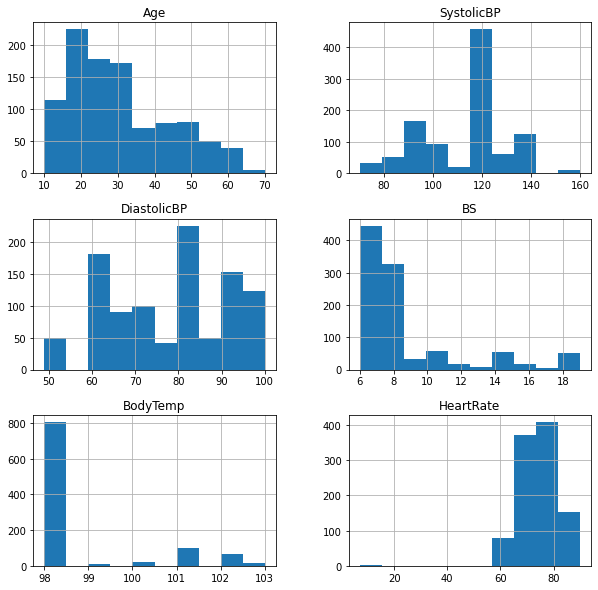

In [ ]:
df.hist(figsize=(10, 10))

RiskLevel
high risk    [[Axes(0.125,0.670278;0.336957x0.209722), Axes...
low risk     [[Axes(0.125,0.670278;0.336957x0.209722), Axes...
mid risk     [[Axes(0.125,0.670278;0.336957x0.209722), Axes...
dtype: object

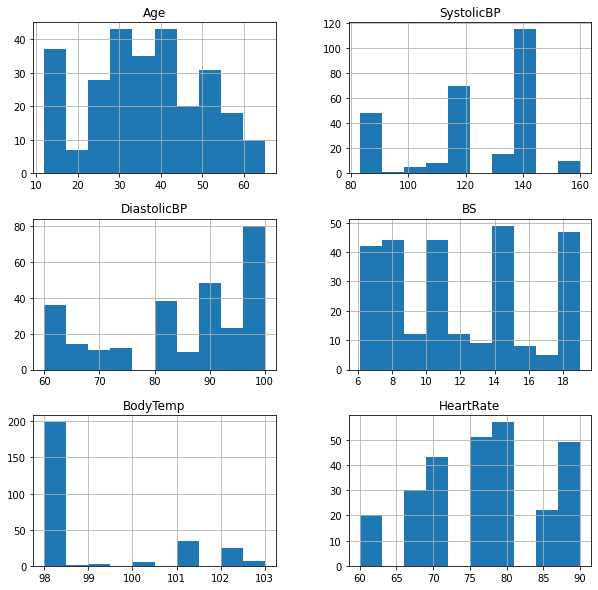

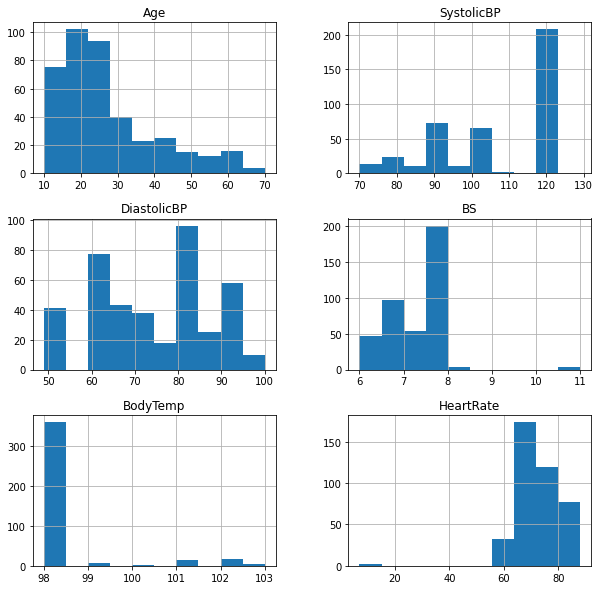

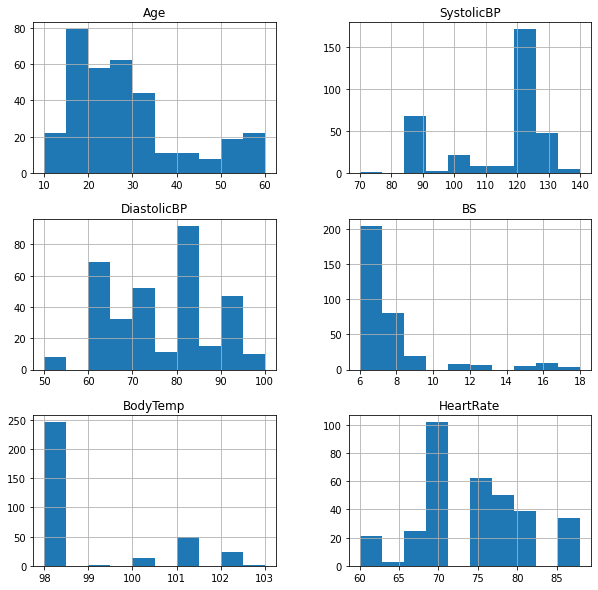

In [ ]:
df.groupby('RiskLevel').hist(figsize=(10,10))

In [ ]:
risk_map = {'low risk': 0, 'mid risk': 1, 'high risk': 2}

In [ ]:
df['RiskLevel'] = df['RiskLevel'].map(risk_map)

In [ ]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,2
1,35,140,90,13.0,98.0,70,2
2,29,90,70,8.0,100.0,80,2
3,30,140,85,7.0,98.0,70,2
4,35,120,60,6.1,98.0,76,0


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-16-f0f86bb9996e>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.00,0.42,0.40,0.47,-0.26,0.08,0.27
SystolicBP,0.42,1.00,0.79,0.43,-0.29,-0.02,0.40
DiastolicBP,0.40,0.79,1.00,0.42,-0.26,-0.05,0.35
BS,0.47,0.43,0.42,1.00,-0.10,0.14,0.57
BodyTemp,-0.26,-0.29,-0.26,-0.10,1.00,0.10,0.16
HeartRate,0.08,-0.02,-0.05,0.14,0.10,1.00,0.19
RiskLevel,0.27,0.40,0.35,0.57,0.16,0.19,1.00


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

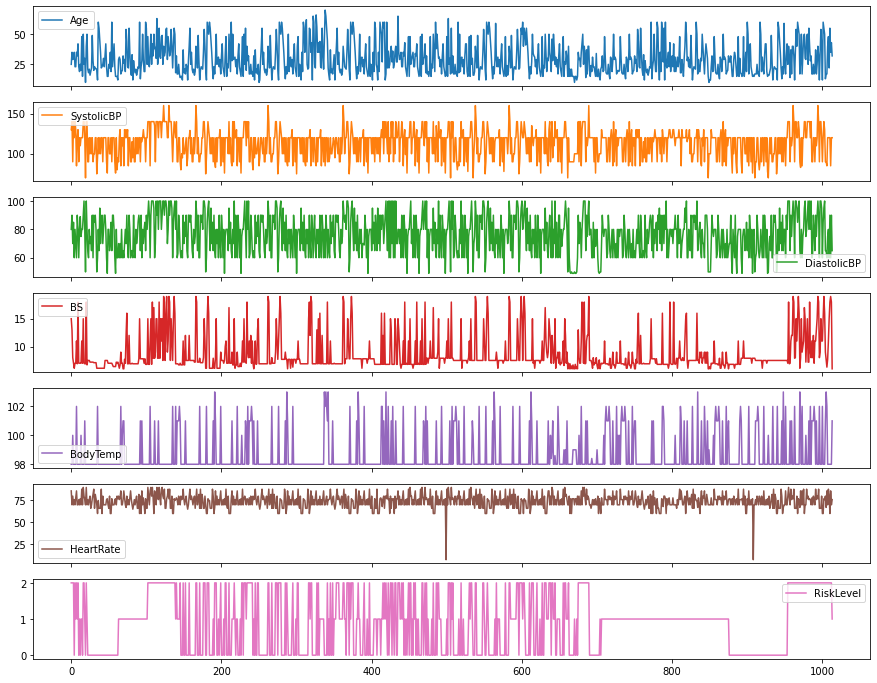

In [ ]:
df.plot(subplots=True, figsize=(15, 12))

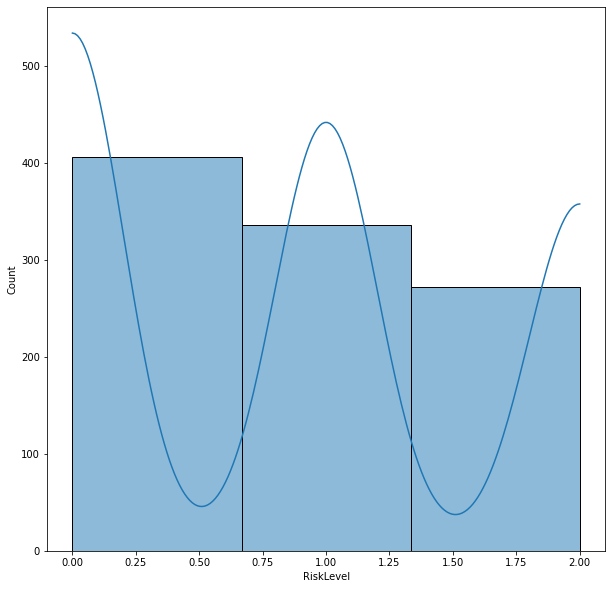

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(data=df, x='RiskLevel', bins=3, kde=True)
plt.show()

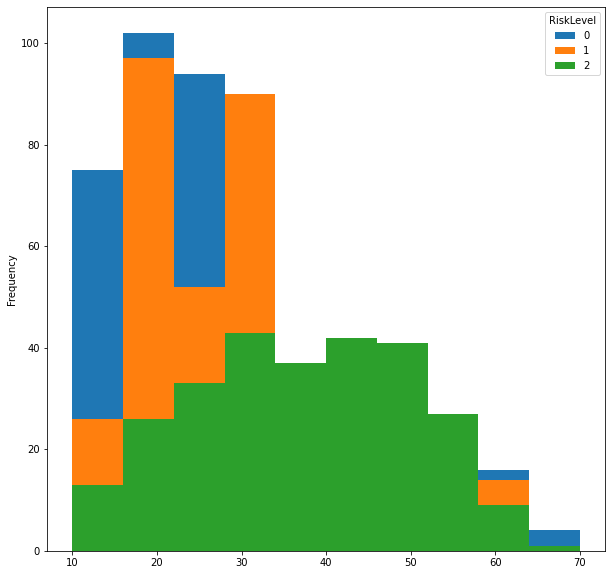

In [ ]:
df.pivot(columns='RiskLevel', values='Age').plot.hist(figsize=(10,10))
plt.show()

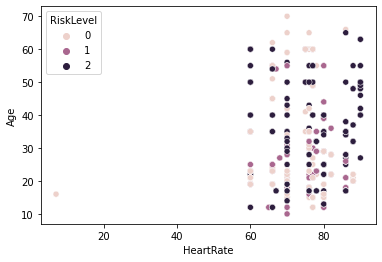

In [ ]:
sns.scatterplot(x="HeartRate", y="Age", 
                hue="RiskLevel",data = df);

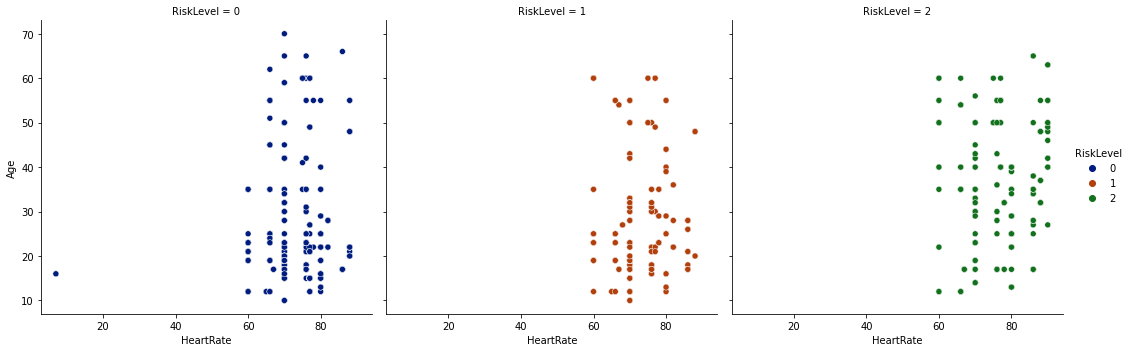

In [ ]:
sns.relplot(x="HeartRate", y="Age", hue="RiskLevel",
            col="RiskLevel",palette='dark', data=df)

# **Model Building**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = df.apply(LabelEncoder().fit_transform)

In [ ]:
X = df.drop('RiskLevel', axis= 1)
y = df['RiskLevel']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=None)

In [ ]:
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6929133858267716

In [ ]:
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [ ]:
#create dummies
x_train=pd.get_dummies(X_train)
x_test=pd.get_dummies(X_test)

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.7913385826771654

In [ ]:
from sklearn.ensemble import BaggingRegressor
model = BaggingRegressor(tree.DecisionTreeRegressor(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.7066773976268166

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.6417322834645669

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.6159941052137103

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier(learning_rate=0.01,random_state=1)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.6889763779527559

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model= GradientBoostingRegressor()
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.6786522870937017

In [ ]:
import xgboost as xgb
model1=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
model1.fit(x_train, y_train)
model1.score(x_test,y_test)

0.7401574803149606

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

In [ ]:
pip install sklearn-nature-inspired-algorithms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn_nature_inspired_algorithms.model_selection import NatureInspiredSearchCV

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

In [ ]:
nia_search = NatureInspiredSearchCV(
    model1,
    param_test1,
    cv=10,
    verbose=1,
    algorithm='gwo',
    population_size=25,
    max_n_gen=10,
    max_stagnating_gen=100,    
    runs=5,
    scoring='f1_macro',
    random_state=42,
)

nia_search.fit(X_train, y_train)

Fitting 10 folds for some of the 12 candidates, which might total in 120 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Run 1/5 finished
Run 2/5 finished
Run 3/5 finished
Run 4/5 finished
Run 5/5 finished
Optimization finished, 12 candidates were fitted (totalling 120 fits)


NatureInspiredSearchCV(algorithm='gwo', cv=10,
                       estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               gpu_id=None, grow_policy=None,
                                               importance_type=None,
                                               interaction_constrain...
                                               max_leaves=None,
                                               min_child_weight=1, missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=100, n_jobs=None,
                                               num_parallel_tree=None,
                                               objective='multi:softprob',
                                               predictor=None, ...),
                       max_n_gen=10, max_stagnating_gen=100,
                       param_grid={'max_depth': range(3, 10, 2),
                                   'min_child_weight': range(1, 6, 2)},
                       population_size=25, random_state=42, runs=5,
                       scoring='f1_macro', verbose=1)

In [ ]:
A = nia_search.best_params_

In [ ]:
A

{'max_depth': 9, 'min_child_weight': 3}

In [ ]:
from sklearn.metrics import classification_report
model1=xgb.XGBClassifier(random_state=2,**A)

model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8252    0.8416    0.8333       101
           1     0.6923    0.7590    0.7241        83
           2     0.9333    0.8000    0.8615        70

    accuracy                         0.8031       254
   macro avg     0.8170    0.8002    0.8063       254
weighted avg     0.8116    0.8031    0.8054       254



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
accuracies = cross_val_score(estimator = model1, X = X_train, y = y_train, cv = 10)


In [ ]:
accuracies.mean()

0.7543859649122806

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
ab_clf = AdaBoostClassifier() 
gb_clf = GradientBoostingClassifier() 
xgb_clf = XGBClassifier() 

ensembler = VotingClassifier(estimators=[('AdaBoostClassifier', ab_clf), ('GradientBoostingClassifier', gb_clf),
                                        ('XGBClassifier', xgb_clf)], voting = 'hard')

classifiers =[ab_clf, gb_clf, xgb_clf, ensembler]
for clf in classifiers:
    clf_scores = cross_val_score(clf, X_train, y_train, cv = 10)
    print(clf.__class__.__name__, ":::: Mean:", clf_scores.mean(), "Std Dev:", clf_scores.std())
    


AdaBoostClassifier :::: Mean: 0.6596491228070176 Std Dev: 0.06286481707778567
GradientBoostingClassifier :::: Mean: 0.7912280701754385 Std Dev: 0.024118819447135998
XGBClassifier :::: Mean: 0.8017543859649123 Std Dev: 0.042287616818224384
VotingClassifier :::: Mean: 0.7999999999999999 Std Dev: 0.03779063022550529
